In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
import importlib
import os, sys

# some setup 

print(os.getcwd())
# os.chdir('../')
sys.path.append(os.getcwd() + '\ex_kalman')
sys.path.append(os.getcwd() + '\luenberger')
sys.path

import m_radar
importlib.reload(m_radar)
from m_radar import c_radar


d:\gh_repo\filters\ex_kalman


ModuleNotFoundError: No module named 'm_radar'

In [2]:
print(np.sqrt(6.25))

2.5


In [139]:
# objects definition 
rdr = c_radar([0, 0, 0], 0)

# just scale factor
rdr.sf = 0.9    # -10% percents 
rdr.bias = 0 # meter bias
rdr.noise = 0 # the std of the noise is 10m error. 

dsf = []
# main loop 
for r in range(1000):
    rdr.measure(r)
    dsf.append([r, rdr.r])   
dsf = np.asarray(dsf)

# scale factor and bias
rdr.sf = 0.9    # -10% percents 
rdr.bias = -70 # meter bias
rdr.noise = 0 # the std of the noise is 10m error. 

dbias = []
# main loop 
for r in range(1000):
    rdr.measure(r)
    dbias.append([r, rdr.r])   
dbias = np.asarray(dbias)


# scale factor, bias and noise
rdr.sf = 0.9    # -10% percents 
rdr.bias = -70 # meter bias
rdr.noise = 20 # the std of the noise is 10m error. 

dns = []
# main loop 
for r in range(1000):
    rdr.measure(r)
    dns.append([r, rdr.r])   
dns = np.asarray(dns)



c:\Users\Ziv Meri\.pyenv\pyenv-win\versions\3.7.4\lib\site-packages\ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
c:\Users\Ziv Meri\.pyenv\pyenv-win\versions\3.7.4\lib\site-packages\ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
c:\Users\Ziv Meri\.pyenv\pyenv-win\versions\3.7.4\lib\site-packages\ipykernel_launcher.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

In [140]:


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
# plt.rcParams['text.usetex'] = True

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# 
# plt.show() plots all the figures present in the state machine. Calling it only at the end of 
#       the script, ensures that all previously created figures are plotted.
# Now you need to make sure that each plot indeed is created in a different figure. That can be 
#       achieved using plt.figure(fignumber) where fignumber is a number starting at index 1.
#

Text(0.5, 1.0, 'noise hist')

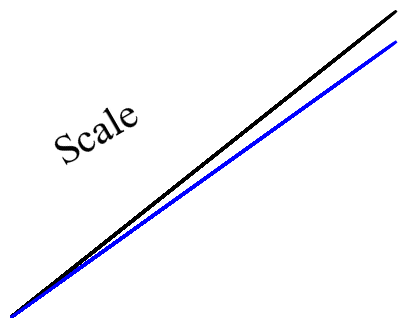

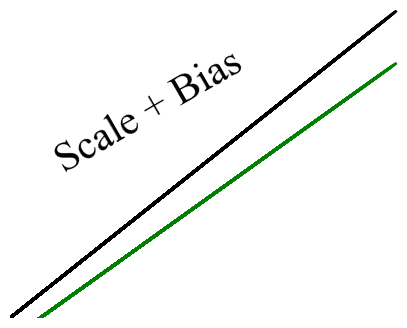

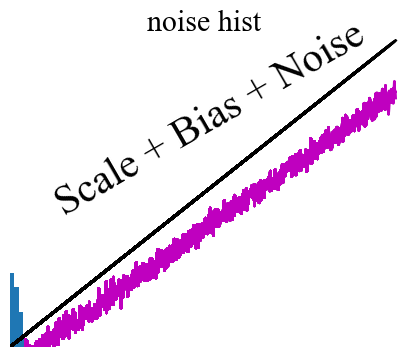

In [141]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 18

# plt.plot(data)
fol = os.getcwd() + '/fig'
if not os.path.exists(fol):
    os.mkdir(fol)
    
    
rot = 30

plt.figure(1)
# plt.title('scale factor')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.text(100, 600
         , "Scale"
         , size = 30
         , ha = "left" 
         , va = "center"
         , rotation = rot
         , fontfamily = 'Times New Roman'
         )
plt.axis('off')

plt.figure(2)
# plt.title('scale factor & bias')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.text(100, 670
         , "Scale + Bias"
         , size = 30
         , ha = "left" 
         , va = "center"
         , rotation = rot
         , fontfamily = 'Times New Roman'
         )
plt.axis('off')

plt.figure(3)
# plt.title('scale factor & bias & noise')
plt.xlim(0, 1000)
plt.ylim(0, 1000)  
plt.text(100, 740
         , "Scale + Bias + Noise"
         , size = 30
         , ha = "left" 
         , va = "center"
         , rotation = rot
         , fontfamily = 'Times New Roman'
         )
plt.axis('off')
    
for r in range(0, 1000, 4):
    plt.figure(1)
    plt.plot(dsf[:r, 0], dsf[:r, 0], 'k', linewidth = 2)
    plt.plot(dsf[:r, 0], dsf[:r, 1], 'b', linewidth = 2) 
    # plt.title('scale factor')
    # plt.xlim(0, 1000)
    # plt.ylim(0, 1000)
    plt.savefig(fol + "/a_sf_" + str(r), dpi = 72) # frames
# plt.show()

    plt.figure(2)
    plt.plot(dsf[:r, 0], dsf[:r, 0], 'k', linewidth = 2)
    plt.plot(dbias[:r, 0], dbias[:r, 1], 'g', linewidth = 2)
    # plt.title('scale factor & bias')
    # plt.xlim(0, 1000)
    # plt.ylim(0, 1000)
    plt.savefig(fol + "/b_sf_bias_" + str(r), dpi = 72) # frames
# plt.show()

    plt.figure(3)
    plt.plot(dsf[:r, 0], dsf[:r, 0], 'k', linewidth = 2)
    plt.plot(dns[:r, 0], dns[:r, 1], 'm', linewidth = 2)
    # plt.title('scale factor & bias & noise')
    # plt.xlim(0, 1000)
    # plt.ylim(0, 1000)
    plt.savefig(fol + "/c_sf_bias_noise" + str(r), dpi = 72) # frames

# plt.show()

plt.hist(rdr.noise * np.random.randn(1000))
plt.title('noise hist')
# plt.show()

In [135]:
import natsort
import shutil

fdir = os.listdir(os.getcwd() + '\\fig')
f = natsort.natsorted([os.getcwd() + '\\fig\\' + fi for fi in fdir if fi.lower().endswith('png')])

for g in range(0000, 3000, 4):
    shutil.copy(f[g], os.getcwd() + '\\fig4')  # dst can be a folder; use shutil.copy2() to preserve timestamp

In [137]:
sys.path.append('../')
import gen_gif
importlib.reload(gen_gif)

gen_gif.gen_gif(os.getcwd() + '\\fig4')

_img_movie.gif is saved in d:\gh_repo\filters
